In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [29]:
data_df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv", index_col=0)

data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


This is a multiple Linear Regression problem with three independent variables: TV , radio and newspaper and one dependent variable: sales. There are 200 samples in the dataset *ie.* $n = 200$

This multiple linear regression problem can be represented in matrix form as:

$$\mathbf{\hat{y}} = \mathbf{X} \boldsymbol{\beta}$$

$$\begin{bmatrix}
\hat{y_1} \\ 
\hat{y_2} \\
\vdots \\
\hat{y_{200}}
\end{bmatrix} =   \begin{bmatrix}
  1 & x_{1\ 1} & x_{1\ 2} & x_{1\ 3} \\
  1 & x_{2\ 1} & x_{2\ 2} & x_{2\ 3} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{200\ 1} & x_{200\ 2} & x_{200\ 3}
 \end{bmatrix} \times \begin{bmatrix}
\beta_0 \\ 
\beta_1 \\
\beta_2 \\
\beta_3
\end{bmatrix}$$


The predicted output for the samples can be computed as:
\begin{align*}\hat{y_1} &= \beta_0x_{1\ 0}+ \beta_1x_{1\ 1} + \beta_2x_{1\ 2} + \beta_3 x_{1\ 3}\\
\hat{y_2} &= \beta_0x_{2\ 0}+ \beta_2x_{2\ 1} + \beta_2x_{2\ 2} + \beta_3 x_{2\ 3}\\
\hat{y_3} &= \beta_0x_{3\ 0}+ \beta_1x_{3\ 1} + \beta_2x_{3\ 2} + \beta_3 x_{3\ 3}\\
.\\
.\\
.\\
.\\
\hat{y_{200}} &= \beta_0x_{200\ 0}+ \beta_1x_{200\ 1} + \beta_2x_{200\ 2} + \beta_3 x_{200\ 3}
\end{align*}


Generalizing, for any $i^{th}$ sample, predicted output can be computed as:

$$\hat{y_i} = \beta_0x_{i\ 0}+ \beta_1x_{i\ 1} + \beta_2x_{i\ 2} + \beta_3 x_{i\ 3}$$
 where for all $i$ = $1$ to $n$, $x_{i0} =1$



In [30]:
X = data_df.drop('sales', axis = 1).to_numpy()

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


X = np.concat((np.ones((200,1)), scaled_X), axis = 1)

Y = data_df['sales'].to_numpy().reshape(-1,1)

In [31]:
n, d = X.shape

## Random Initialization

Let's initialize the values of parameters randomly. The function `initialize_beta` uses the [`numpy.random.randn`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) function to initialize the parameters using the random values sampled from **standard normal distribution**. It returns an array of the shape $d\times 1$ (where $d$ = no. of features) containing the initial values of the parameters. In our case $d=4$ (including the ones column).

In [32]:
def initializer(d):
    np.random.seed(0)
    betas = np.random.randn(d,1)
    return betas

betas = initializer(4)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


## Cost Function

In OLS, you minimized the sum of squared error (SSE). Here you will be minimizing the cost function. The cost function $J(.)$ is nothing but the sum of squared error multiplied by $\frac{1}{2}$ to make the derivation easier. You should know that multiplying the cost function with $\frac{1}{2}$ only changes the value of the cost function but not the optimal parameters that minimize it.

\begin{align*}
J(\beta_0, \beta_1, \beta_2, \beta_3) &= \frac{1}{2}\sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})^2 \\
&= \frac{1}{2}\sum_{i=1}^{n}((\beta_0x_{i0}+\beta_1x_{i1} +\beta_2x_{i2} + \beta_3x_{i3})-y_{i})^2
\end{align*}

The cost function can be written in matrix form as:

$$J(\boldsymbol{\beta}) = \frac{1}{2}\ \sum(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})^2$$


*Note: We call $J$ as a function of only parameters $\boldsymbol{\beta}$ but not of $X$ and $y$ because $X$ and $y$ are constants given by the dataset. So the value of $J$ depends only on the parameters.*

**You want to find the parameters $\beta_0, \beta_1, \beta_2$ and $\beta_3$ that minimizes the cost function $J$ using Gradient Descent.**


In [33]:
def calculate_cost(betas):
    cost =  0.5 * np.sum(np.square(np.dot(X,betas) - Y))
    return cost

calculate_cost(betas)

np.float64(17073.932296410057)

## Gradient

Partial derivative(gradient) of the cost function with respect to $\beta_1$, 

\begin{align*}
\frac{\partial J}{\partial \beta_1} &= \frac{\partial}{\partial \beta_1}\ \frac{1}{2}\ \sum_{i=1}^{n}(\hat{y_{i}}-{y_{i}})^2\\
&=\frac{1}{2}\ \sum_{i=1}^{n}\frac{\partial}{\partial \beta_1}(\hat{y_{i}}-{y_{i}})^2
\end{align*}

$\hspace{8cm}$Applying chain rule,

\begin{align*}
\hspace{8cm}&=\frac{1}{2}\ \sum_{i=1}^{n}\frac{\partial (\hat{y_{i}}-{y_{i}})^2}{\partial (\hat{y_{i}}-{y_{i}})} \times \frac{\partial (\hat{y_{i}}-{y_{i}})}{\partial \beta_1}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i}) \times \frac{\partial (\beta_0x_{i0} + \beta_1x_{i1} + \beta_2x_{i2} + \beta_3x_{i3})-y_i)}{\partial \beta_1}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i}) \times x_{i1}\\
\therefore \frac{\partial J}{\partial \beta_1}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i1} 
\end{align*}

Similarly, 

\begin{align*}\frac{\partial J}{\partial \beta_0}&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i0}\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})\times 1\\
&=\sum_{i=1}^{n}(\hat{y_i} - {y_i})
\end{align*}


$$\frac{\partial J}{\partial \beta_2}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i2}$$

$$\frac{\partial J}{\partial \beta_3}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{i3}$$

In general, the formula for calculating the gradients with respect to a parameter $\beta_j$ can be expressed as:

$$\frac{\partial J}{\partial \beta_j}=\sum_{i=1}^{n}(\hat{y_i} - {y_i})x_{ij}$$


We can write this generalized expression in matrix form to calculate the gradients wrt. all the parameters simultaneously as:

$$\frac{\boldsymbol{\partial J}}{\boldsymbol{\partial \beta}}= \mathbf{X^T}(\mathbf{\hat{y}-y}) = \begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\ 
\frac{\partial J}{\partial \beta_1}\\
\frac{\partial J}{\partial \beta_2}\\
\frac{\partial J}{\partial \beta_3}
\end{bmatrix} $$

In [34]:
def calculate_gradients(X,y, betas):
    gradient = np.dot(X.T, (np.dot(X,betas) - y))
    return gradient

calculate_gradients(X,Y, betas)

array([[-2451.68953081],
       [ -698.05275055],
       [ -240.94240852],
       [  284.39547481]])

## Gradient Descent

Now you need to update the parameters using their respective gradients until the cost function converges to its minimum value.


${\hspace{5cm}}\text{Repeat until convergence }\{$

$$\beta_0 :=\beta_0-\alpha\frac{\partial J}{\partial \beta_0}$$

$$\beta_1 :=\beta_1-\alpha\frac{\partial J}{\partial \beta_1}$$

$$\beta_2 :=\beta_2-\alpha\frac{\partial J}{\partial \beta_2}$$

$$\beta_3 :=\beta_3-\alpha\frac{\partial J}{\partial \beta_3}$$

${\hspace{8cm}}\}$




Since you already have a vector $\beta$ called `beta` containing parameters and an another vector $\frac{\partial J}{\partial \beta}$ called `gradients` containing the gradients of cost function with respect to the parameters, this updation is a simple matrix operation:

$$\boldsymbol{\beta} := \boldsymbol{\beta} - \alpha \boldsymbol{\frac{\partial J}{\partial \beta}}$$

In [35]:
def gradient_descent(X,y, alpha =0.01 , max_iter = 1000, precision_change = 0.0001):
    iteration = 0
    difference = 1
    n, d = X.shape

    betas = initializer(d)
    cost = calculate_cost(betas)
    history = [cost]

    while difference > precision_change and iteration <= max_iter:
        betas = betas - alpha * calculate_gradients(X,y, betas)

        cost = calculate_cost(betas)
        history.append(cost)
        difference = np.abs(history[iteration] - cost)

        print(f"Iteration {iteration}, cost {cost}")
        iteration += 1

        if (cost == np.inf):
            print("Cost reached infinity, try smaller lr")
            break

    return betas, iteration, history

In [41]:
optimized_betas, best_step, history = gradient_descent(X, Y, alpha = 0.005)

Iteration 0, cost 349.9900354594012
Iteration 1, cost 287.38594759229784
Iteration 2, cost 279.54333934087987
Iteration 3, cost 278.5551746779677
Iteration 4, cost 278.43060995046767
Iteration 5, cost 278.414900211747
Iteration 6, cost 278.41291791588446
Iteration 7, cost 278.41266764382414
Iteration 8, cost 278.41263602682443


In [37]:
optimized_betas

array([[14.02249789],
       [ 3.91925014],
       [ 2.79157142],
       [-0.0220466 ]])

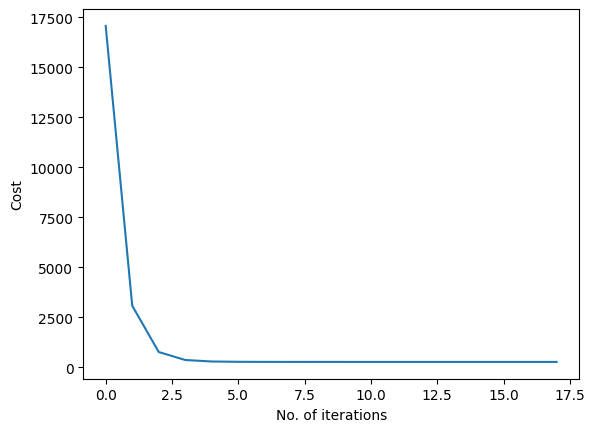

In [38]:
import matplotlib.pyplot as plt

plt.plot(history)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
# plt.ylim
plt.show()